# Imports



In [356]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import PIL
from PIL import Image

# Read, Write, Resize

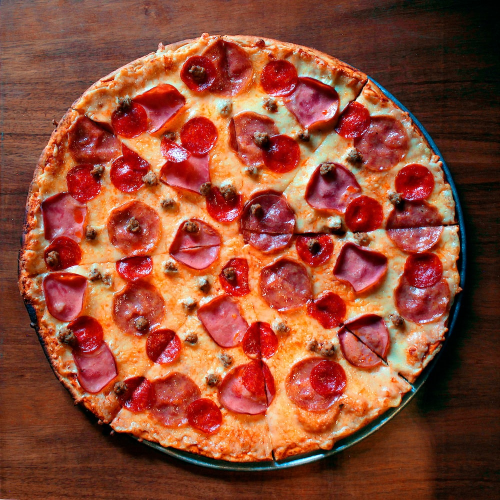

In [357]:
img = cv2.imread('/content/sample_pizza.jpg') # read
#cv2_imshow(img)
dim = (500, 500)
#resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
resized_img = cv2.resize(img, dim) # resize
cv2_imshow(resized_img) # write

# Shape, Size

In [358]:
print(img.shape) # row, height, no of channels
print(img.size) # no of pixels
px = img[100, 50]
print(px) # bgr values
print(img[100, 50, 0]) # blue
print(img[100, 50, 1]) # green
print(img[100, 50, 2]) # red

(1000, 1000, 3)
3000000
[ 76  83 122]
76
83
122


# Subplot Images

In [359]:
def subplot_imgs(output, titles):
  figure(figsize=(20, 20), dpi = 80)
  l = len(output)
  for i in range(l):
    plt.subplot(1, l, i+1)
    plt.imshow(cv2.cvtColor(output[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
  plt.show()

# Split Channels & Merge

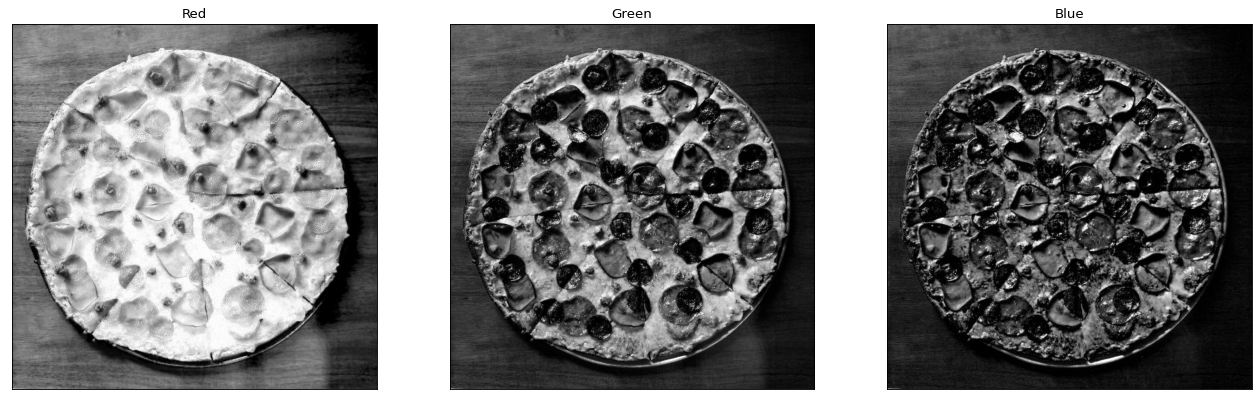

In [360]:
(b, g, r) = cv2.split(img)

#B = cv2.cvtColor(b, cv2.COLOR_BGR2RGB)
#G = cv2.cvtColor(g, cv2.COLOR_BGR2RGB)
#R = cv2.cvtColor(r, cv2.COLOR_BGR2RGB)


output = [r, g, b]
titles = ['Red', 'Green', 'Blue']
subplot_imgs(output, titles)
merge = cv2.merge([b, g, r])
#cv2_imshow(merge)

# Grayscale

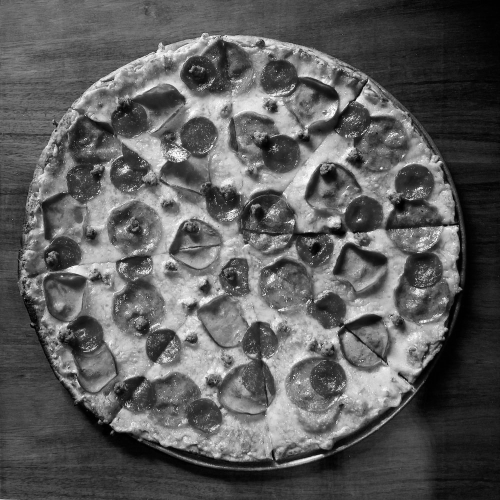

original:  (500, 500, 3)
gray:  (500, 500)


In [361]:
gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY) # convert to grayscale
cv2_imshow(gray)
print('original: ', resized_img.shape)
print('gray: ', gray.shape)

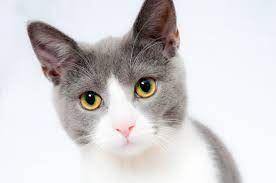

(183, 276, 3)
151524


In [362]:
cat_img = cv2.imread('/content/cat_image.jpg')
cv2_imshow(cat_img)
print(cat_img.shape)
print(cat_img.size)

# Crop

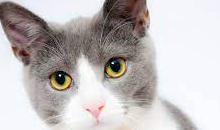

In [363]:
cropped_img = cat_img[20:150, 30:250] # crop
cv2_imshow(cropped_img)

# Rotate

183 276
(138.0, 91.5)


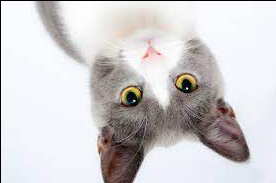

In [364]:
height, width = cat_img.shape[:2]
print(height, width)
center = (width/2, height/2)
print(center)
rotate_matrix = cv2.getRotationMatrix2D(center = center, angle = 180, scale = 1)
rotated_img = cv2.warpAffine(src = cat_img, M = rotate_matrix, dsize = (width, height)) # rotate
cv2_imshow(rotated_img)

# Flip

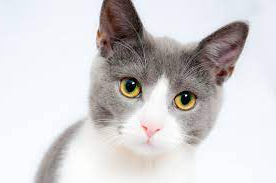

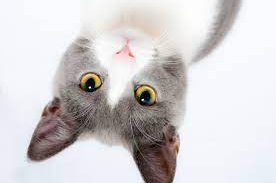

In [365]:
flipped_img = cv2.flip(cat_img, 1) # flip
cv2_imshow(flipped_img)
flipped_img = cv2.flip(cat_img, 0)
cv2_imshow(flipped_img)

# Black Image

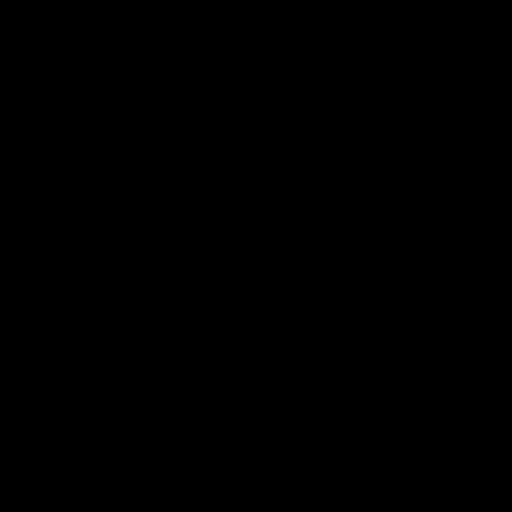

In [366]:
black_img = np.zeros((512, 512, 3), dtype = "uint8") # black image
cv2_imshow(black_img)

# Line, Rectangle, Circle, Text

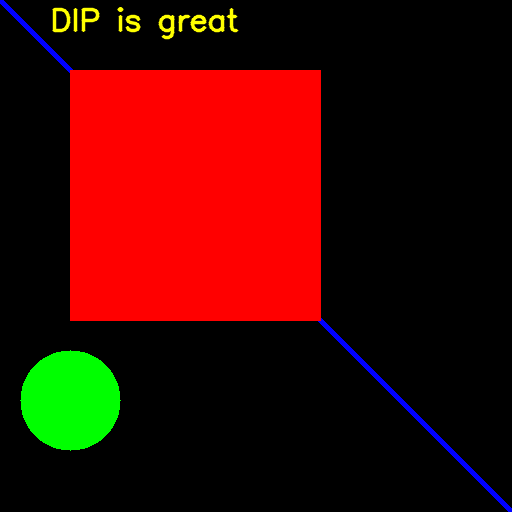

In [367]:
cv2.line(black_img, (0,0), (511, 511), (255, 0, 0), 3) # line drawing
cv2.rectangle(black_img, (70, 70), (320, 320), (0, 0, 255), -1) # rectangle drawing
cv2.circle(black_img, (70, 400), 50, (0, 255, 0), -1) # circle drawing

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(black_img, 'DIP is great', (50, 30), font, 1, (0, 255, 255), 2, cv2.LINE_AA) # add text
cv2_imshow(black_img)

# Sampling

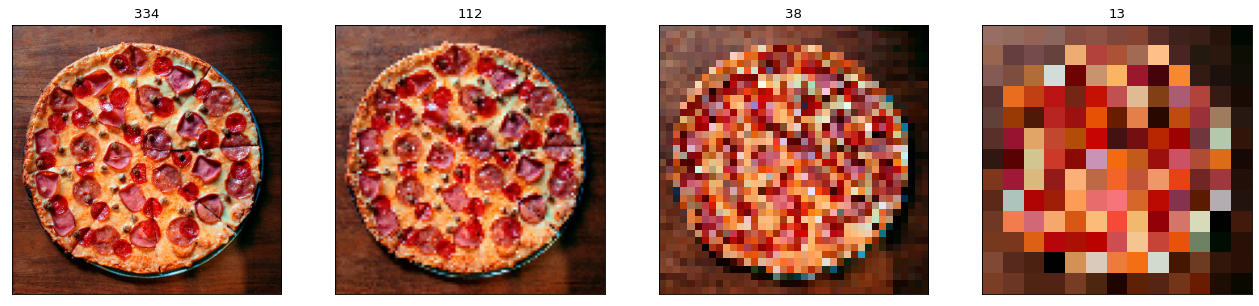

In [368]:
def sampling(img, N):
  dim = (N, N)
  #rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  sam_img = cv2.resize(img, dim)
  return sam_img

N = [334, 112, 38, 13] # sampling rate
sam_list = []
for i in range(4):
  sam_list.append(sampling(img, N[i]))
stN = [str(x) for x in N]
subplot_imgs(sam_list, stN)

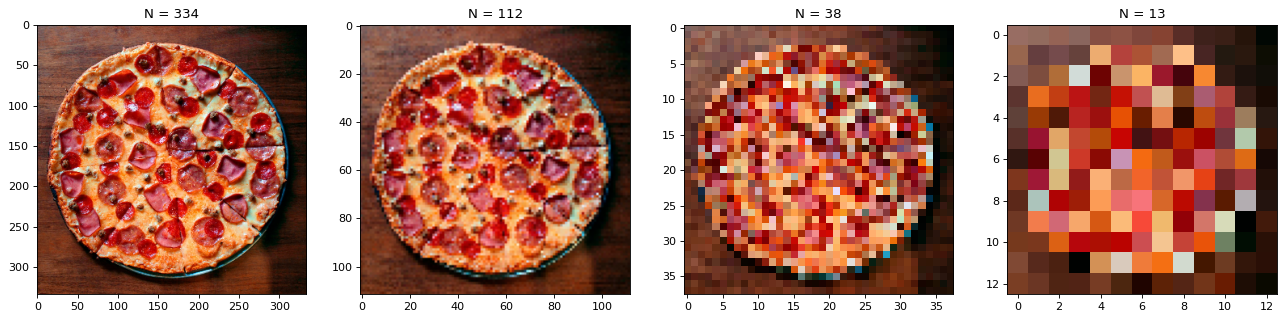

In [369]:
figure(figsize=(20, 20), dpi = 80)
for i in range(4):
  temp_img = sampling(img, N[i])
  rgb_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
  plt.subplot(1, 4, i + 1)
  plt.title(f'N = {N[i]}')
  plt.imshow(rgb_img)
plt.show()

# Quantization

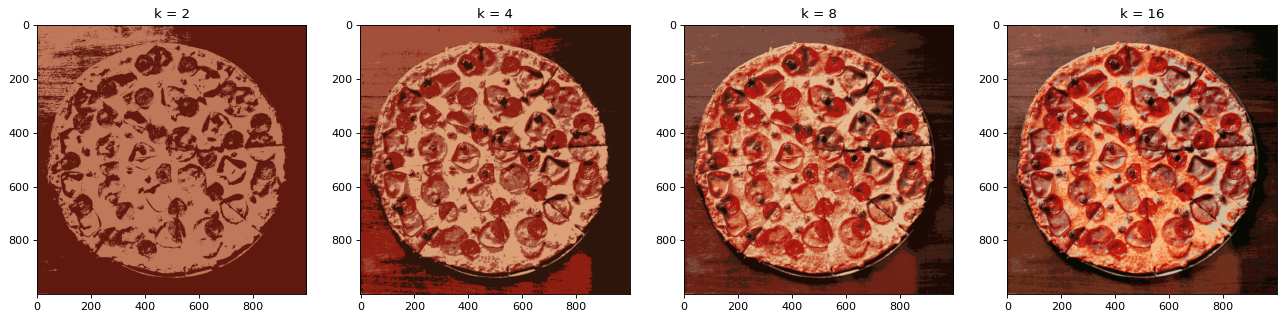

In [370]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

obj_img = Image.open(r'/content/sample_pizza.jpg')
#obj_img = Image.open(rgb_img)

k = [2, 4, 8, 16] # image gray level

figure(figsize=(20, 20), dpi = 80)
for i in range(4):
  #quan_img = obj_img.quantize(k[i])
  quan_img = obj_img.convert('P', palette=Image.ADAPTIVE, colors=k[i])
  plt.subplot(1, 4, i + 1)
  plt.title(f'k = {k[i]}')
  plt.imshow(quan_img)
plt.show()  

# White Image

In [371]:
white_img1 = np.zeros((500, 500, 3), dtype = "uint8")
white_img1.fill(255)
white_img2 = np.zeros((500, 500, 3), dtype = "uint8")
white_img2.fill(255)
#cv2_imshow(white_img)

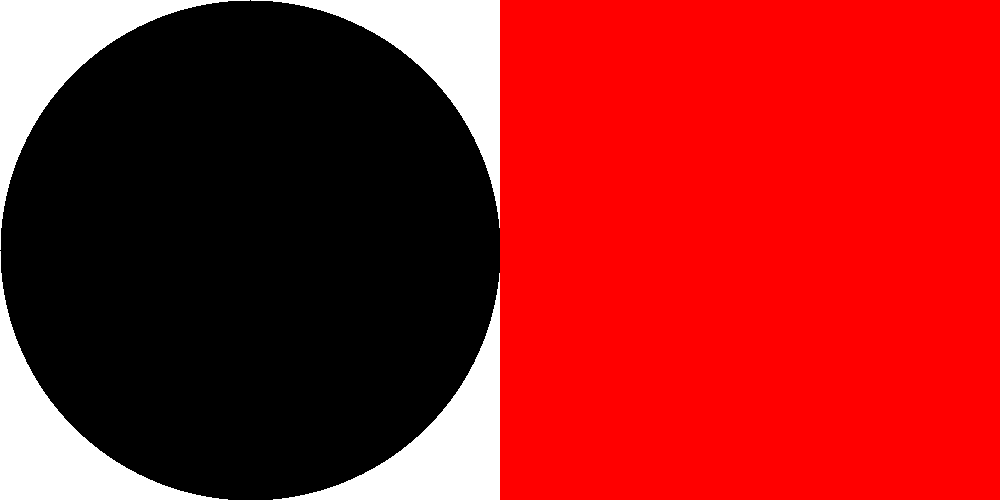

In [372]:
img1 = cv2.circle(white_img1, (250, 250), 250, (0, 0, 0), -1)
#cv2_imshow(img1)
img2 = cv2.rectangle(white_img2, (0, 0), (500, 500), (0, 0, 255), -1) # -1 to fill image
#cv2_imshow(img2)
res = np.hstack((img1, img2))
cv2_imshow(res)

# Arithmetic

In [373]:
list_img = []
list_img.append(cv2.add(img1, img2))
list_img.append(cv2.subtract(img1, img2))
list_img.append(cv2.multiply(img1, img2))
list_img.append(cv2.bitwise_and(img1, img2))
list_img.append(cv2.bitwise_or(img1, img2))
list_img.append(cv2.bitwise_not(img1, img2))

In [374]:
rgb_list = []
for im in list_img:
  rgb_list.append(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
  #cv2_imshow(im)

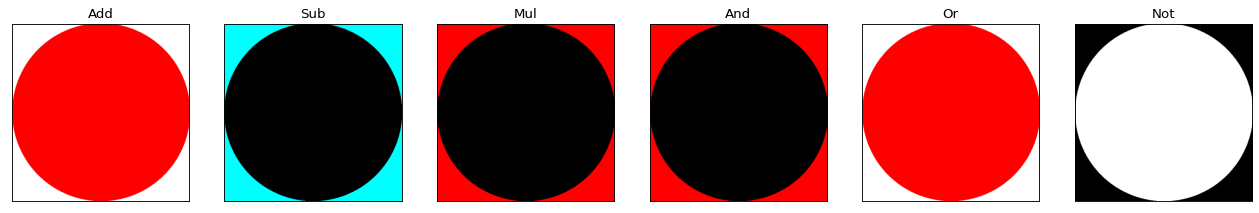

In [375]:
figure(figsize=(20, 20), dpi = 80)
output = rgb_list
titles = ['Add', 'Sub', 'Mul', 'And', 'Or', 'Not']
l = len(output)
for i in range(l):
  plt.subplot(1, l, i+1)
  plt.imshow(output[i])
  plt.title(titles[i])
  plt.xticks([])
  plt.yticks([])
plt.show()

# Grayscale & Intensity

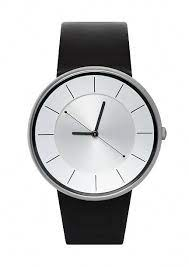

In [376]:
watch_img = cv2.imread('/content/watch_image.jpg')
cv2_imshow(watch_img)

Mean Intensity

In [377]:
gray_watch = cv2.cvtColor(watch_img, cv2.COLOR_BGR2GRAY)
#cv2_imshow(gray_watch)
#print(gray_watch.shape)

h, w = gray_watch.shape[:2]
c = 0
sum = 0
for i in range(0, h):
  for j in range(0, w):
    sum = sum + gray_watch[i, j]
    c = c + 1

avg = sum / c
print("Mean Intensity: ", avg)

c = 0
sum = 0
cons = 16
for i in range(0, h):
  for j in range(0, w):
    gray_watch[i, j] = gray_watch[i, j] + cons
    sum = sum + gray_watch[i, j]
    c = c + 1

avg = sum / c
print("New Mean Intensity: ", avg)

Mean Intensity:  208.59084874066147
New Mean Intensity:  67.9764579989299


Inverting Colors

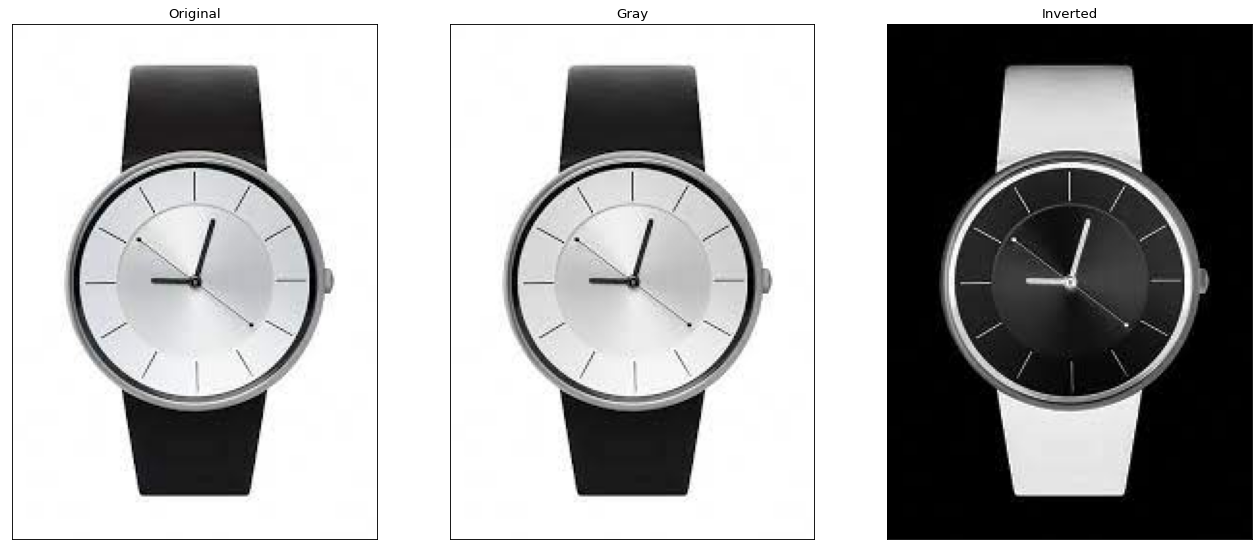

In [378]:
gray_watch = cv2.cvtColor(watch_img, cv2.COLOR_BGR2GRAY)
gray_copy = gray_watch.copy()
#cv2_imshow(gray_watch)
#print(gray_watch.shape)

h, w = gray_watch.shape[:2]
c = 0
sum = 0
for i in range(0, h):
  for j in range(0, w):
    gray_copy[i, j] = 255 - gray_copy[i, j]

output = [watch_img, gray_watch, gray_copy]
titles = ['Original','Gray', 'Inverted']
subplot_imgs(output, titles)

# Negative Image

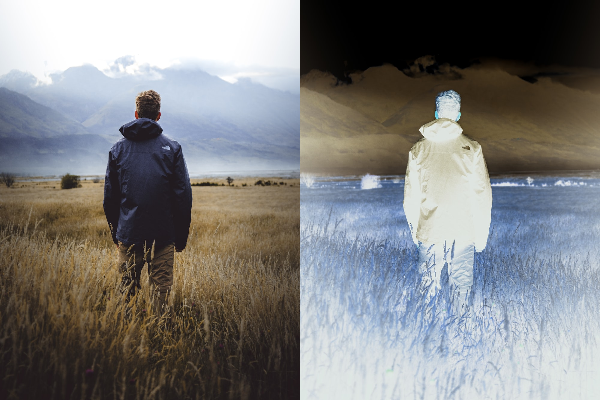

In [379]:
hum_img = cv2.imread('/content/human_image.jpg')
hum_img = cv2.resize(hum_img, (300, 400))
#cv2_imshow(hum_img)
M = hum_img.max() # max intensity
negative = M - hum_img
res = np.hstack((hum_img, negative))
cv2_imshow(res)

# Power Law Transformation / Gamma Correlation

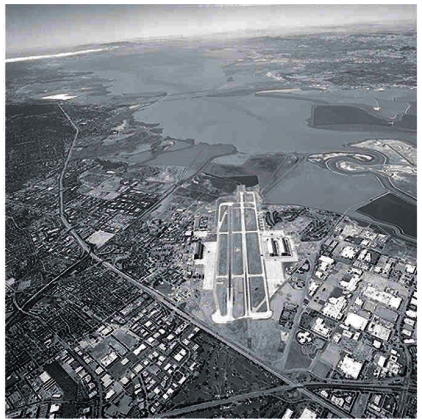

In [380]:
# s = c * (r ** gamma)
city_img = cv2.imread('/content/city_image.png')
gamma = 4
gamma_trans = np.array(255*(city_img / 255) ** gamma, dtype = 'uint8')
#cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_trans)
cv2_imshow(gamma_trans)

# Contrast Stretching

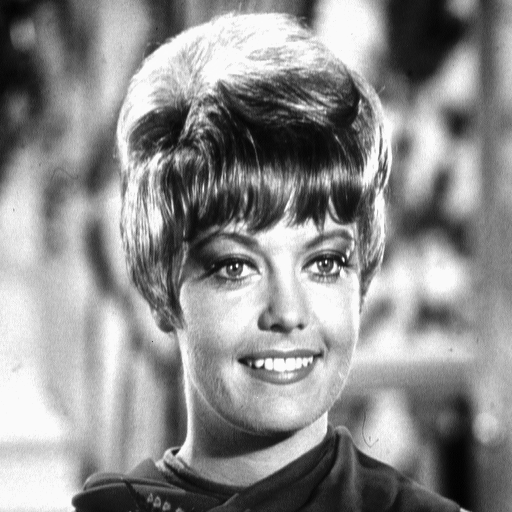

In [381]:
celeb_img = cv2.imread('/content/celeb_image.png')
#print(celeb_img.shape)

def pixelVal(px, r1, s1, r2, s2):
  if (0 <= px and px <= r1):
    return (s1 / r1) * px
  elif (r1 < px and px <= r2):
    return ((s2 - s1) / (r2 - r1)) * (px - r1) + s1
  else:
    return ((255 - s2) / (255 - r2)) * (px - r2) + s2

def contrast_stretching(img, r1, s1, r2, s2):
  pixelVal_vec = np.vectorize(pixelVal)
  contrast_stretched = pixelVal_vec(img, r1, s1, r2, s2)
  #cv2.imwrite('contrast_stretch.jpg', contrast_stretched)
  #cv2_imshow(cv2.imread('contrast_stretch.jpg'))
  cv2_imshow(contrast_stretched) 

r1 = 30
s1 = 30
r2 = 150
s2 = 250
contrast_stretching(celeb_img, r1, s1, r2, s2)

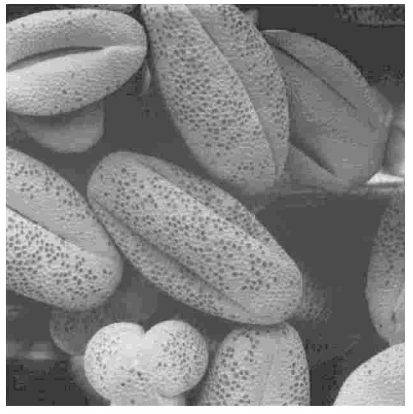

In [382]:
cell_img = cv2.imread('/content/cell_image.png', 0)
r1 = 110
s1 = 0
r2 = 160
s2 = 250
contrast_stretching(cell_img, r1, s1, r2, s2)

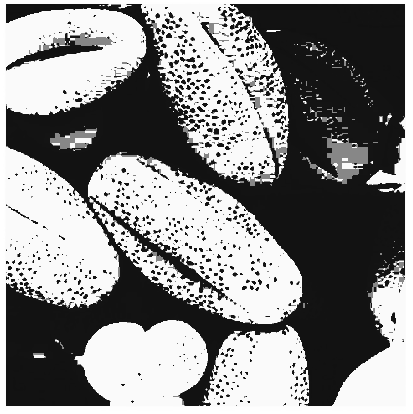

In [383]:
#cell_img = cv2.imread('/content/cell_image.png', 0)
r1 = 135
s1 = 20
r2 = 137
s2 = 250
contrast_stretching(cell_img, r1, s1, r2, s2)

# Histogram Equalization

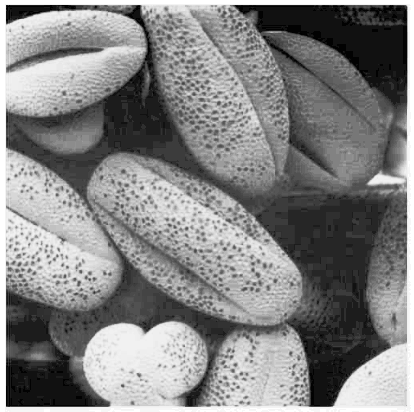

In [384]:
cell_img = cell_img = cv2.imread('/content/cell_image2.png', 0)
equ = cv2.equalizeHist(cell_img)
cv2_imshow(equ)

# Unsharp Masking & Highboost Filtering

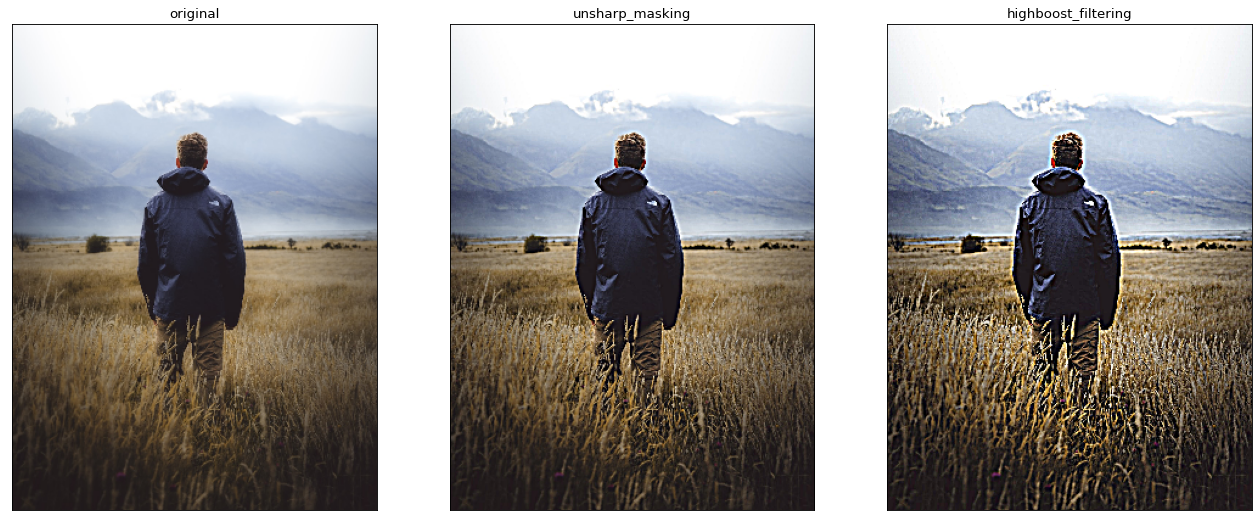

In [385]:
#blur_img = cv2.GaussianBlur(img, (7, 7), 0)
blur_hum = cv2.blur(hum_img, (7, 7))
#cv2_imshow(blur_img)
unsharp_masking = cv2.addWeighted(hum_img, 2, blur_hum, -1, 0)
highboost_filtering = cv2.addWeighted(hum_img, 4, blur_hum, -3, 0) # k = 3
subplot_imgs([hum_img, unsharp_masking, highboost_filtering], ['original','unsharp_masking', 'highboost_filtering'])

# Second Order Derivative (Laplacian Mask)

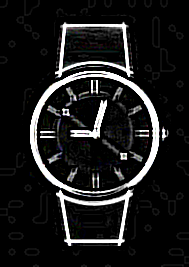

In [386]:
blur_watch = cv2.blur(watch_img, (7, 7))
edges = cv2.Laplacian(blur_watch, -1, ksize = 5, scale = 1, delta = 0, borderType = cv2.BORDER_DEFAULT)
#edges = cv2.Laplacian(blur_watch, -1, ksize = 5, borderType = cv2.BORDER_DEFAULT)
cv2_imshow(edges)

# Sobel Operator

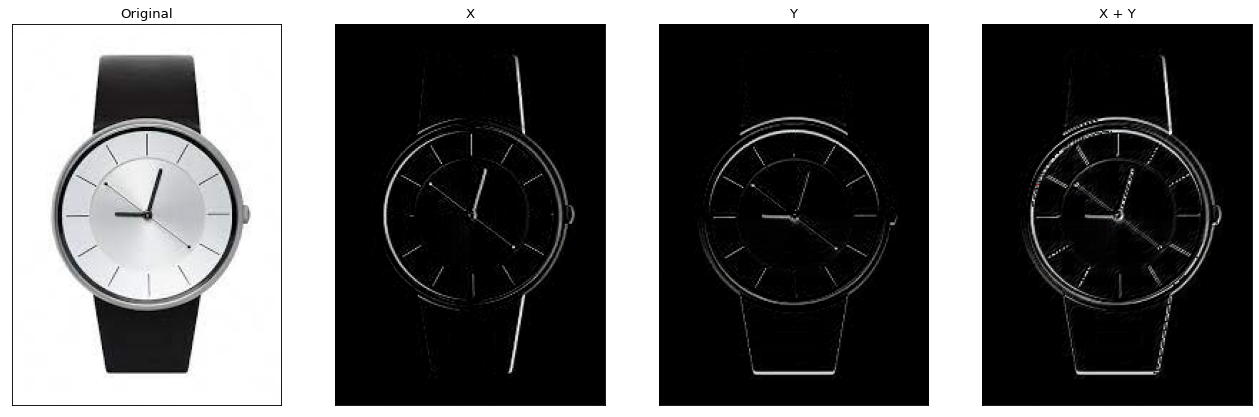

In [387]:
edgex = cv2.Sobel(watch_img, -1, dx = 1, dy = 0, ksize = 1)
edgey = cv2.Sobel(watch_img, -1, dx = 0, dy = 1, ksize = 1)

edges = edgex + edgey

output = [watch_img, edgex, edgey, edges]
titles = ['Original', 'X', 'Y', 'X + Y']
subplot_imgs(output, titles)